# Tarea 7.3 #
 ### Moisés Echeverría ###
 #### FIS1344 - Métodos númericos y probabilidades ####

Ejercicio 2.1.15 del libro de Burden.

Un abrevadero (contenedor de agua para dar de beber a los animales) es mitad de un cilindro. Tiene una sección transversal a forma de semi-círculo de radio r=48.934 cm y una longitud L=1.3245 m. Si el volumen del agua contenido es de 10.013 litros, encuentre la profundidad del agua en metros con una precisión de cinco cifras decimales. (Para lograrlo, primero use algunas iteraciones del método de bisección y así obtener un par de puntos iniciales para el método de Newton.).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Definimos la función del metodo de bisección que obtuvimos en clases

In [2]:
def biseccion(f, a, b, epsilon, N=1000000):
    
    for i in range(N):
        p = a + (b - a)/2
        print(p)
        if abs(f(p)) < epsilon:
            print("Cero en", p, "encontrado después de", i, "iteraciones.")
            return p
        elif f(p)*f(a) > 0:
            a = p
        else:
            b = p
    print("No se encontró el cero después de", N, "iteraciones.")

Definimos el metodo de Newton que obtuvimos en clases

In [3]:
def newton(f, df, po, epsilon, N=1000000):
    
    for i in range(N):
        p = po - f(po)/df(po)
        if abs(p - po)/abs(p) < epsilon:
            return p, i+1
        po = p
    
    raise MaxIterations("No se encontró el cero luego de", N, "iteraciones.")

In [4]:
def V_Semicilindro(r):    #volumen del semicilindro 
    return ((np.pi*(r**2)*1.3245)/2)

In [5]:
def V_Semicilindromenosagua(r):    #volumen del semicilindro menos el agua
    return ((np.pi*(r**2)*1.3245)/2)-0.010013

In [8]:
r=0.48934 #radio del cilindro en metros
l=1.3245  #largo del cilindro en metros
v=10.013*0.001 #volumen del agua en metros cúbicos 
print(V_Semicilindro(0.48934))

0.4981880144449478


In [9]:
print(V_Semicilindromenosagua(0.48934))

0.4881750144449478


Teniendo en cuenta el semicilindro podemos dividir este en cuatro y calcular la mitad del área sin
agua usando la geometría de un triángulo rectángulo y la geometría de un arco de la circunferencia y luego
la multiplicamos por 2 para obtener toda el área del semicilindro que no tiene agua, con esta área podemos 
hacer la diferencia entre el área sin agua y el área total, para obtener el área con agua y calcular el volumen, 
este calculo queda en función de la altura(h) que podemos obtener usando los métodos de bisección y de Newton.


In [20]:
def Altura_del_agua(h): # función del volumen con respecto a la altura
    return (((np.pi*0.48934**2)/2)-(0.48934*(0.48934-h)*np.sin(np.arccos((0.48934-h)/0.48934))\
                        +(0.48934**2)*((np.pi/2)-np.arccos((0.48934-h)/0.48934))))*1.3245-0.010013 

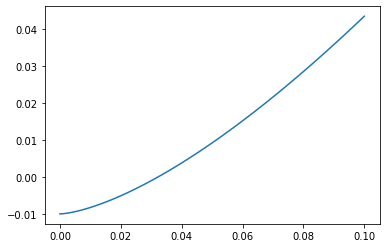

In [21]:
x=np.linspace(0,0.1,100) #graficamos para poder guiarnos donde se encuentra el 0
plt.plot(x,Altura_del_agua(x)) #podemos ver que se encuentre entre 0.02 y 0.04

Ahora tomamos la funcion anterior y la derivamos para poder hacer el metodo de Newton

In [12]:
def Derivada_del_agua(h):
    return (((2.04356*(h**2))-(2*h)-0.15879083)/(np.sqrt(-4.17617*(h**2)+4.08713*h)))\
                                            -0.48934*np.sqrt(-4.17617*(h**2)+4.08713*h)

In [29]:
biseccion(Altura_del_agua,0.02,0.04,0.0000001) #usamos la biseccion con los valores de la grafica

0.03
0.035
0.0325
0.03125
0.031875
0.0321875
0.032343750000000004
0.032265625000000006
0.0322265625
0.03224609375
0.032236328125000005
0.0322412109375
0.03223876953125
0.032239990234375
Cero en 0.032239990234375 encontrado después de 13 iteraciones.


0.032239990234375

In [30]:
newton(Altura_del_agua,Derivada_del_agua,0.032239990234375,0.00001)
#usamos newton con el valor que nos dio la bisección

(0.032239990514550315, 1)

In [39]:
Altura_del_agua(0.032239990234375)
#podemos ver que el valor es muy cercano a 0 al evaluarlo en la función

2.2251219096436348e-10

El valor de la altura del agua es 0.032239

# Calificación: 6.0

La verdadera expresión para el volumen del agua es:

$$
V = L\left(\cos^{-1}\left(\frac{(r - p)}{r}\right) r^2 - \frac{1}{2}(r - p)\sqrt{r^2 + (r - p)^2}\right)
$$